In [1]:
%matplotlib inline

In [2]:
#import dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
#import excel sheet and create pandas dataframe
diabetes_data = Path("/Users/coderjuhi/Desktop/Projects/Project 4/Project4-Group3/diabetes_prediction_dataset.csv")
diabetes_data_pd = pd.read_csv(diabetes_data)
diabetes_data_pd

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
#explore types of values in smoking_history column
diabetes_data_pd['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [5]:
#drop smoking_history column since majority of the data has "No Info"
diabetes_data_pd.drop(columns='smoking_history', axis=1, inplace=True)
diabetes_data_pd

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,27.32,6.2,90,0
99996,Female,2.0,0,0,17.37,6.5,100,0
99997,Male,66.0,0,0,27.83,5.7,155,0
99998,Female,24.0,0,0,35.42,4.0,100,0


In [6]:
#check for null values in dataset
diabetes_data_pd.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
#change gender column values to 0, 1, and 2
diabetes_data_pd['gender'].replace({'Female':0, 'Male':1, 'Other':2}, inplace=True)

In [8]:
#rename diabetes_data_pd to diabetes_cleaned_df and view dataframe
diabetes_cleaned_df = diabetes_data_pd
diabetes_cleaned_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,0,24.0,0,0,35.42,4.0,100,0


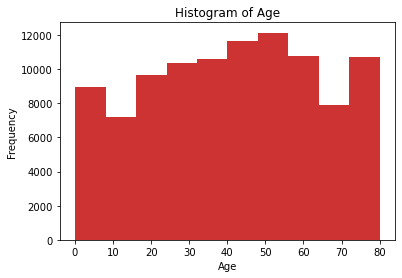

In [36]:
#explore distribution of cleaned data using histograms
plt.hist(diabetes_cleaned_df.age, color='#CD3333')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("histogram_age.jpg")

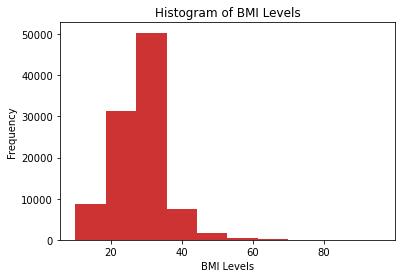

In [37]:
#explore distribution of cleaned data using histograms
plt.hist(diabetes_cleaned_df.bmi, color='#CD3333')
plt.title("Histogram of BMI Levels")
plt.xlabel("BMI Levels")
plt.ylabel("Frequency")
plt.savefig("histogram_bmi.jpg")

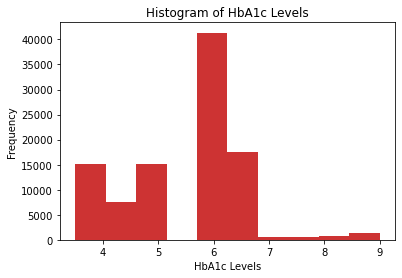

In [38]:
#explore distribution of cleaned data using histograms
plt.hist(diabetes_cleaned_df.HbA1c_level, color='#CD3333')
plt.title("Histogram of HbA1c Levels")
plt.xlabel("HbA1c Levels")
plt.ylabel("Frequency")
plt.savefig("histogram_A1c.jpg")

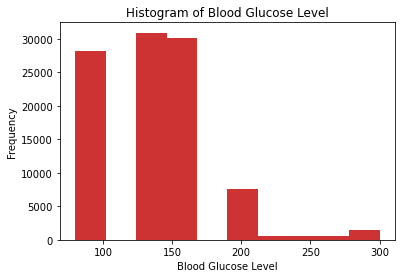

In [39]:
#explore distribution of cleaned data using histograms
plt.hist(diabetes_cleaned_df.blood_glucose_level, color='#CD3333')
plt.title("Histogram of Blood Glucose Level")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Frequency")
plt.savefig("histogram_glucose.jpg")

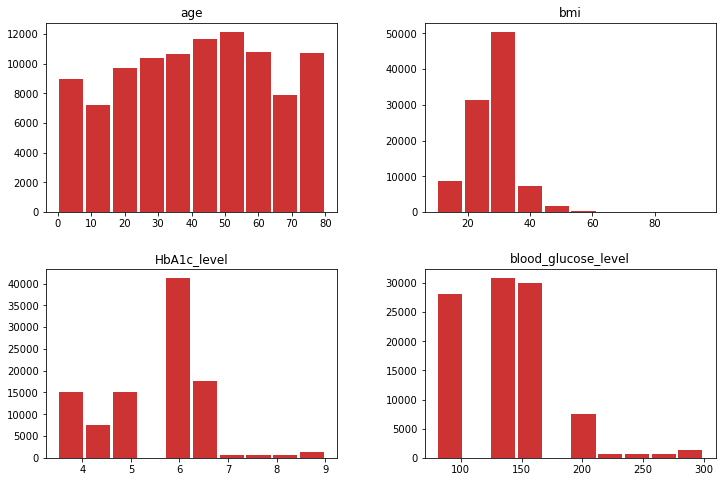

In [40]:
#create one image with all histograms
ax = diabetes_cleaned_df[['age','bmi','HbA1c_level','blood_glucose_level']].hist(grid=False, figsize=(12,8), color='#CD3333', zorder=2, rwidth=0.9)
plt.savefig("histogram_all.jpg")